# PROJECT 3 - Student grades prediction

# Student grades prediction

Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/dsrscientist/dataset4
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
import joblib

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [4]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [6]:
df.tail(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,...,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,...,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,...,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,...,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [7]:
df.shape

(571, 43)

In [8]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [11]:
df=pd.DataFrame(df)

In [12]:
import numpy as np
df=df.replace(np.nan,'WU')

In [13]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [14]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [15]:
df['CS-412'].unique()

array(['A-', 'B', 'A', 'C+', 'B+', 'C-', 'B-', 'WU', 'A+', 'C', 'D+', 'F',
       'W', 'D'], dtype=object)

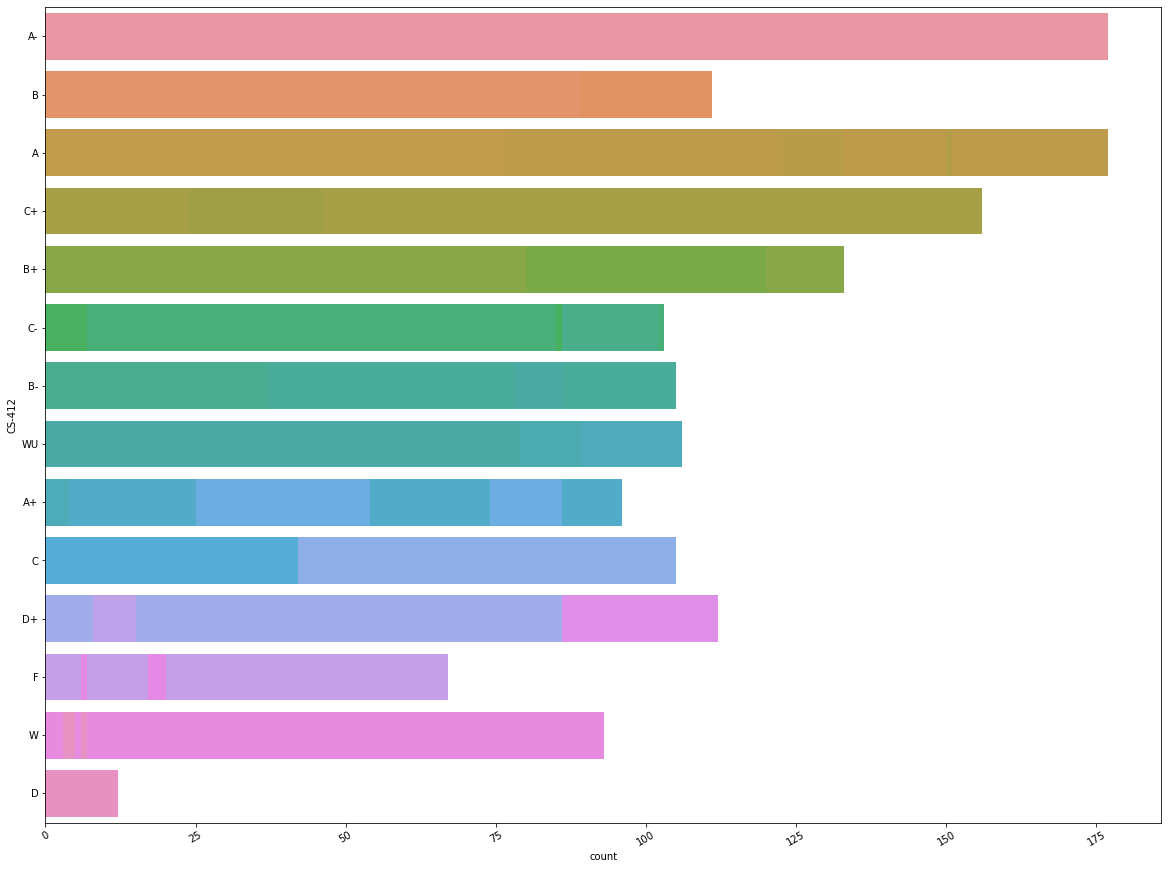

In [16]:
plt.figure(figsize=(20,15))
plotnumber=1
for col in df.columns[0:42]:
    plt.subplot
    plotnumber +=1
    ax=sns.countplot(y=df[col])
    plt.xticks(rotation=30)
plt.show()

In [17]:
df_visualization=df[['CGPA']].copy()

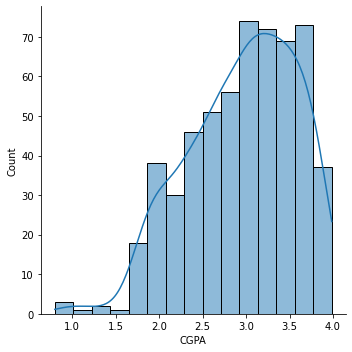

In [18]:
sns.displot(df_visualization['CGPA'],kde=True)

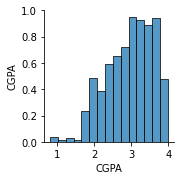

In [19]:
sns.pairplot(data=df)

In [20]:
df=df.drop(['Seat No.'],axis=1)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [22]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [23]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.919440,4.262697,3.931699,2.838879,4.157618,3.994746,3.917688,4.814361,...,4.281961,4.982487,3.663748,5.595447,4.621716,2.693520,4.084063,4.211909,4.570928,2.954888
std,3.046895,2.785317,2.986606,3.211983,3.024559,2.696709,2.763742,3.066224,2.688224,3.170678,...,3.534691,2.927134,3.128656,2.916243,4.268672,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,12.000000,11.000000,13.000000,13.000000,13.000000,12.000000,12.000000,13.000000,3.985000


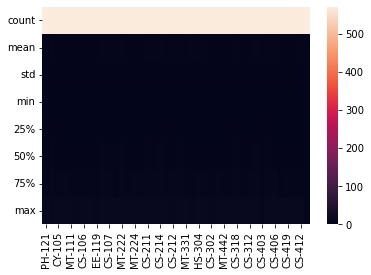

In [25]:
sns.heatmap(df.describe(), cbar=True)
plt.show()

In [26]:
corr=df.corr()['CGPA'].sort_values()
corr

EL-332      -0.803600
CS-210      -0.801957
CS-317      -0.800771
CS-306      -0.783694
CS-302      -0.770868
CS-215      -0.769892
CS-214      -0.758407
MT-111      -0.755209
CS-301      -0.747775
MT-224      -0.744213
CS-421      -0.742041
CS-419      -0.732899
EE-217      -0.703507
MT-222      -0.695117
CS-212      -0.685874
CS-203      -0.682817
TC-383      -0.682447
ME-107      -0.677225
CY-105      -0.670068
CS-211      -0.669389
EL-102      -0.668323
EE-119      -0.668064
PH-121      -0.663135
CS-318      -0.658395
CS-403      -0.657128
MT-442      -0.656557
HS-304      -0.656440
CS-107      -0.649398
EE-222      -0.644384
HS-105/12   -0.627236
CS-423      -0.624558
CS-105      -0.613169
MT-331      -0.610787
EF-303      -0.585824
CS-106      -0.561930
CS-312      -0.559268
HS-101      -0.537170
CS-414      -0.512836
HS-205/20   -0.500607
CS-412      -0.470128
CS-406      -0.298012
CGPA         1.000000
Name: CGPA, dtype: float64

In [27]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.990978
HS-105/12    0.329887
MT-111       0.501508
CS-105       0.930769
CS-106       0.659766
EL-102       0.514310
EE-119       0.586575
ME-107       0.116594
CS-107       0.437506
HS-205/20    1.061488
MT-222       0.229109
EE-222       0.864582
MT-224       0.504277
CS-210       0.877099
CS-211       0.160096
CS-203       0.337821
CS-214       0.120394
EE-217       0.807423
CS-212       0.418386
CS-215       0.232261
MT-331       0.674150
EF-303       0.452507
HS-304       0.705399
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.515720
CS-318       0.435670
CS-306       0.497827
CS-312       0.496966
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.017687
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
CGPA        -0.497203
dtype: float64

In [28]:
df.dtypes

PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object

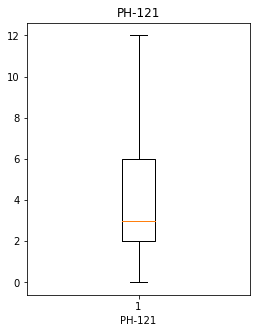

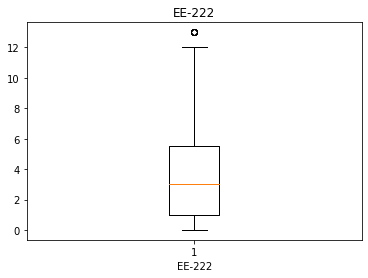

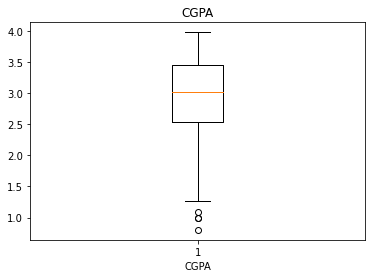

In [29]:
newdf=['PH-121','EE-222','CGPA']
plt.subplots(figsize=(4, 5))
for i, column in enumerate(newdf):
    plt.boxplot(df[column], vert=True)
    plt.title(column)
    plt.xlabel(column)
    plt.show()

In [30]:
df.shape

(571, 42)

In [31]:
threshold = 3
for column in newdf:
    zscore = np.abs((df[column] - df[column].mean()) / df[column].std(ddof=0))
    data = df.drop(df[zscore > threshold].index)

In [32]:
z_scores = np.abs((df[newdf] - df[newdf].mean()) / df[newdf].std())
threshold = 3
data = df[(z_scores < threshold).all(axis=1)]
outliers_removed_data = pd.DataFrame(data, columns=data.columns)

outliers_removed_data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [33]:
dataloss=(571-563)/571*100 
dataloss

1.4010507880910683

Now we will start with the spliting the dataset into training and testing sets 

In [36]:
x = df.drop(['CGPA'], axis=1)
y = df['CGPA']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
Lr = LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [41]:
Lr.score(x_train,y_train)

0.9509381908703822

In [42]:
y_predict = Lr.predict(x_test)

Let's evaluate the trained model by predicting the CGPA for the test data and calculating the mean squared error.

In [43]:
# Now, calculating the mean squared error
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.014000513293540781


Finally, we can predict the CGPA of a student based on their grades in four years. 

In [ ]:
x_train = scaler.fit_transform(x_train)

In [45]:
import joblib
joblib.dump(Lr, "Student_Grades_Prediction.pkl")

['Student_Grades_Prediction.pkl']

In [46]:
new_Lr = joblib.load(open('Student_Grades_Prediction.pkl','rb'))
result=new_Lr.score(x_test,y_test)
print(result*100)

95.79295755874654


In [47]:
# Converting the grades to a DataFrame
new_Data = pd.DataFrame([new_Lr.predict(x_test)[:],y_predict[:]],index=['Predicted','Original'])
new_Data

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
Predicted,2.040485,3.467675,2.773745,2.382998,3.947544,3.457433,2.58071,2.390245,2.3049,3.077499,...,3.577866,2.424306,2.636127,2.592545,2.704665,2.630597,3.325054,3.800317,3.458056,2.757798
Original,2.040485,3.467675,2.773745,2.382998,3.947544,3.457433,2.58071,2.390245,2.3049,3.077499,...,3.577866,2.424306,2.636127,2.592545,2.704665,2.630597,3.325054,3.800317,3.458056,2.757798
